In [52]:
import pandas as pd
import time

import platform
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates, ticker

from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

from konlpy.tag import Okt
import nltk

In [40]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
news_data = pd.read_csv("./CSV/03_news_all_data.csv")
news_data.columns

Index(['뉴스 식별자', '날짜', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부'],
      dtype='object')

In [23]:
keyword_tmp = news_data[["날짜", "키워드", "특성추출(가중치순 상위 50개)"]]
keyword_tmp.columns = ["날짜", "키워드", "특성추출"]

keyword_100 = keyword_tmp.groupby("날짜").head(100)

In [24]:
keyword_tmp.head(3)

,날짜,키워드,특성추출
0,2020-01-21,"중국발,폐렴,공포,우리나라,안전지대,코로나바이러스,중국발,신종,일명,우한,武漢,폐렴...","중국,사망자,확진자,우리나라,중국인,춘제,희생자,한국,안전지대,중국발,방역당국,전염..."
1,2020-01-21,"춘절,기간,관광객,13만,폐렴,비상,공항,방역,인천국제공항,전수조사,직행,노선,승객...","중국,우한시,인천공항,중국인,항공기,감염자,인천국제공항,관광객,이용객,불가능,방문자..."
2,2020-01-21,"폐렴,감염,사스급,전염병,사람,전염,확인,6명,사망,확진,의료진,호주,필리핀,의심환...","중국,1명,사스,우한,광둥성,전염병,의료진,베이징,긴급회의,상하이,전문가,코로나바이..."


In [25]:
len(keyword_100)

59000

In [26]:
start = time.time()

keyword_list = []
keyword = ""
key = ""

for idx, val in enumerate(keyword_100["키워드"]) :
    keyword = keyword + val + ","
    if idx % 10000 == 0 :
        print(idx, val)
        
for idx, val in enumerate(keyword_100["특성추출"]) :
    key = key + val + ","
    if idx % 10000 == 0 :
        print(idx, val)

print("keyword length :", len(keyword))
print("key length :", len(key))
print("소요시간 :", time.time() - start)

0 중국발,폐렴,공포,우리나라,안전지대,코로나바이러스,중국발,신종,일명,우한,武漢,폐렴,환자,20일,발견,공항,입국장,적발,격리,조치,우리나라,신종,전염병,안전지대,사실,확인,바이러스,발생국,중국,바이러스,전염,원천,전파,경로,파악,사람,사람,전파,가능,배제,정황,사태,21일,폐렴,중국,확진자,218명,질병,사망자,4명,확진자,44명,확진자,위중,중태,사망자,중국,방역,체계,중국,환자,급속도,상황,태국,일본,우리나라,폐렴,환자,바이러스,확산,국면,의미,공항,항만,철저,검역,급선무,추가,확진자,발생,지역,사회,확산,중요,사회,불안,공포,조장,신종,전염병,적극,강조,중국,홍콩,648명,희생자,사스,SARS,사망자,사우디아라비아,802명,사망자,메르스,우리나라,38명,희생자,방역당국,초기,대응,성패,여부,차이,이달,30일,중국,최대,명절,춘제,春節,기간,연휴,중국인들,국제,대이동,예정,기간,3만,춘제,연휴,기간,중국,관광객,한국,방문,예상,연휴,기간,한국,중국인,근로자,자국,만큼,전후,연휴,고비,정부,방역당국,대비,시민들,증상,대응,요령,숙지,방어,질병,확산
10000 전두환,반성,5월,필자,부상,민주화,투쟁,안기부,보안대,교도소,섭렵,천형,슬픔,희망,색칠,광주,5,운동,기념,공연,애꾸눈,광대,연극,10년,코로,공연,연습,상황,인생,전두환,광주,낭보,사람,광주,방문,동방예의지국,국민,방청권,신청,시민들,열기,경쟁률,돌파,광주지방법원,필자,구속,철창,무릎,전두환,동상,시민들,플라스틱,망치,전두환,소복,유가족,새끼,40년,반성,골프,동상,분풀이,서울,출발,전두환,시민들,쪽문,법원,광주학살,광주,학살,자행,전두환,18,특별법,구속,국민화합,미명,석방,신부,조카,명예훼손,기소,재판,치매,골프,20만,호화,모습,들통,지탄,여론,출석,법원,동산초등학생들,법원,동산,초등학생,전두환,80년,훌라송,우롱,불성실,태도,사과,반성,거만,유행어,광주시민들,염장,광주,광주,악연,13개월,운명적,광주,방청권,어머니,관련자들,시민들,5월,노래,광주출정가,행진곡,구호,통곡,영령,전두환,사죄,특

In [27]:
print("keyword length :", len(keyword))
print("key length :", len(key))

keyword length : 33249622
key length : 5876594


In [32]:
keyword_list = keyword.split(",")

In [33]:
len(keyword_list)

9250113

In [34]:
keyword_tu = tuple(keyword_list)

In [35]:
len(keyword_tu)

9250113

In [41]:
start = time.time()
keyword = ""

for idx, val in enumerate(keyword_tu) :
    keyword = keyword + val + " "
    if idx % 50000 == 0 :
        print(idx, val)

print("keyword length :", len(keyword))
print("소요시간 :", time.time() - start)

0 중국발
50000 자체
100000 폐렴
150000 방지
200000 감염자
250000 증가
300000 관계자
350000 인삼
400000 위험
450000 대비
500000 사용
550000 구미
600000 실패
650000 구입
700000 파트너사
750000 8일
800000 기관
850000 사람
900000 차질
950000 유럽
1000000 대표
1050000 코로나바이러스


KeyboardInterrupt: 

In [42]:
key_list = key.split(",")

In [43]:
len(key_list)

1376529

In [44]:
key_list

['중국',
 '사망자',
 '확진자',
 '우리나라',
 '중국인',
 '춘제',
 '희생자',
 '한국',
 '안전지대',
 '중국발',
 '방역당국',
 '전염병',
 '사스',
 '시민들',
 '대이동',
 '태국',
 '입국장',
 '만큼',
 '우한',
 '근로자',
 '급속도',
 '일본',
 '春節',
 '武漢',
 '중국',
 '우한시',
 '인천공항',
 '중국인',
 '항공기',
 '감염자',
 '인천국제공항',
 '관광객',
 '이용객',
 '불가능',
 '방문자',
 '검색대',
 '입국장',
 '중국',
 '1명',
 '사스',
 '우한',
 '광둥성',
 '전염병',
 '의료진',
 '베이징',
 '긴급회의',
 '상하이',
 '전문가',
 '코로나바이러스',
 '홍콩',
 '의심환자',
 '호흡기',
 '6명',
 '발병',
 '필리핀',
 '중난산',
 '중국',
 '전파력',
 '질본',
 '의료진',
 '관계자',
 '메르스',
 '증후군',
 '보건당국',
 '호흡기',
 '중국중앙방송',
 '이재갑',
 '접촉자',
 '이선규',
 '한림대강남성심병원',
 '코로나바이러스',
 '공식통보',
 '중국발',
 '항공기',
 '접촉자',
 '중국',
 '질본',
 '관계자',
 '우한',
 '중국발',
 '중국남방항공',
 '보건소',
 '심평원',
 '의약품',
 '3만',
 '9명',
 '감염병',
 'dur',
 '5명',
 '승무원',
 '의약품안전사용서비스',
 '확진자',
 '일본',
 '요양기관',
 '실시간',
 '접촉자들',
 '출국자',
 '사람들',
 '호흡기',
 '중국',
 '위원회',
 '거주자',
 '코로나바이러스',
 '베이징',
 '광둥성',
 '사망자',
 '확진환자',
 '우한시',
 '시진핑',
 '보건위',
 '국가보건위',
 '4명',
 '감염자',
 '사람들',
 '춘제',
 '비상사태',
 '고혈압',
 '세계보건기구',
 '발생지',
 '호주',
 '중국',
 '우한',
 '의심환자

In [46]:
key_tu = tuple(key_list)

In [47]:
len(key_tu)

1376529

In [48]:
start = time.time()
key = ""

for idx, val in enumerate(key_tu) :
    key = key + val + " "
    if idx % 50000 == 0 :
        print(idx, val)

print("key length :", len(key))
print("소요시간 :", time.time() - start)

0 중국
50000 이날
100000 고려대
150000 이날
200000 적용
250000 대통령
300000 3개월
350000 안내면
400000 우리나라
450000 황희영
500000 외래
550000 에어뉴
600000 베이조스
650000 사용
700000 캐리
750000 생산효과
800000 국회입법조사처
850000 팬데믹긴급매입프로그램
900000 이병헌
950000 항아리
1000000 농업인
1050000 부통령
1100000 업체
1150000 김정은
1200000 코스닥
1250000 회복세
1300000 코로나19
1350000 대전
key length : 5876595
소요시간 : 2041.1208002567291


In [49]:
key[:100]

'중국 사망자 확진자 우리나라 중국인 춘제 희생자 한국 안전지대 중국발 방역당국 전염병 사스 시민들 대이동 태국 입국장 만큼 우한 근로자 급속도 일본 春節 武漢 중국 우한시 인천공항'

In [53]:
t = Okt()
doc_nouns = t.nouns(key)
print(len(doc_nouns))

1705939


In [54]:
ko = nltk.Text(doc_nouns, name = "코로나 뉴스 키워드")

In [55]:
print(len(ko.tokens), type(ko.tokens))
print(ko.tokens[0 : 30])
print(ko.vocab().most_common(20))

1705939 <class 'list'>
['중국', '사망자', '확', '진자', '우리나라', '중국인', '춘제', '희생', '한국', '안전지대', '중국', '발', '방역', '당국', '전염병', '사스', '시민', '대이동', '태국', '입국', '만큼', '우한', '근로자', '급속도', '일본', '중국', '우한시', '인천공항', '중국인', '항공기']
[('코로나', 56920), ('확', 11735), ('진자', 11665), ('지역', 10715), ('코로나바이러스', 10515), ('명', 8892), ('한국', 8652), ('방역', 7337), ('서울', 6618), ('감염증', 6408), ('미국', 6287), ('관계자', 6039), ('회', 5867), ('대구', 5692), ('감염', 5598), ('센터', 5541), ('온라인', 5413), ('사업', 5283), ('사회', 5223), ('중국', 5000)]


In [56]:
most_fre = ko.vocab().most_common(50)
most_fre

[('코로나', 56920),
 ('확', 11735),
 ('진자', 11665),
 ('지역', 10715),
 ('코로나바이러스', 10515),
 ('명', 8892),
 ('한국', 8652),
 ('방역', 7337),
 ('서울', 6618),
 ('감염증', 6408),
 ('미국', 6287),
 ('관계자', 6039),
 ('회', 5867),
 ('대구', 5692),
 ('감염', 5598),
 ('센터', 5541),
 ('온라인', 5413),
 ('사업', 5283),
 ('사회', 5223),
 ('중국', 5000),
 ('세', 4973),
 ('의료', 4531),
 ('경북', 4370),
 ('지원', 4318),
 ('시민', 4310),
 ('학생', 4011),
 ('시설', 3954),
 ('위원회', 3894),
 ('만큼', 3882),
 ('교육', 3760),
 ('관리', 3646),
 ('병원', 3640),
 ('확산', 3589),
 ('시간', 3519),
 ('검사', 3370),
 ('활동', 3332),
 ('주민', 3314),
 ('광주', 3273),
 ('안전', 3204),
 ('소', 3174),
 ('사람', 3131),
 ('충남', 3116),
 ('비', 3020),
 ('민주당', 2988),
 ('접촉', 2980),
 ('경제', 2980),
 ('감염병', 2919),
 ('문화', 2878),
 ('전문가', 2864),
 ('원금', 2847)]

In [60]:
stopwords = ["코로나", "확", "진자", "세", "중", "차", "회", "위", "등", "더", "제", "코로나바이러스"]

new_ko = []
for one_word in ko :
    if one_word not in stopwords :
        new_ko.append(one_word)

In [61]:
len(new_ko)

1597034

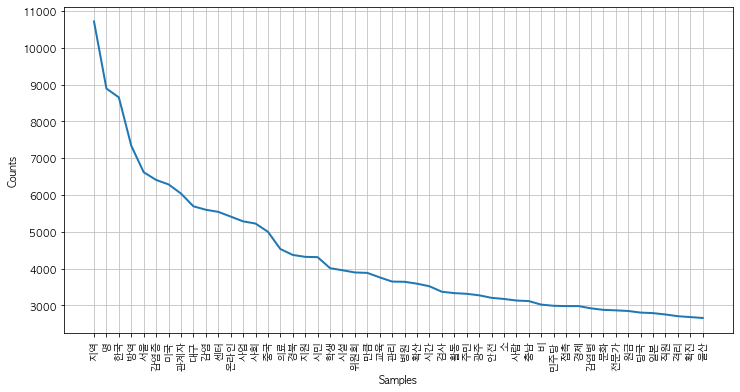

In [62]:
new_ko = nltk.Text(new_ko, name = "코로나 키워드 뉴스 제목2")
plt.figure(figsize = (12, 6))
new_ko.plot(50)

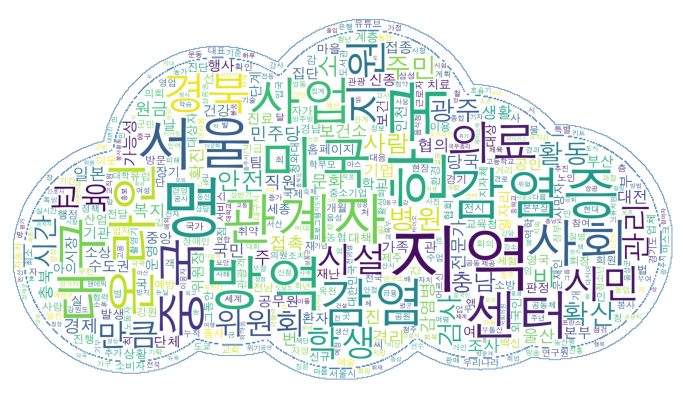

In [65]:
cloud_mask = np.array(Image.open("./PNG/cloud image/cloud_icon6.png"))

data = new_ko.vocab().most_common(1000)

wc = WordCloud(background_color = "white", 
               max_words = 500,
               mask = cloud_mask,
               font_path = '/Library/Fonts/AppleGothic.ttf',
               contour_width = 2,
               contour_color = "steelblue",
               max_font_size = 300).generate_from_frequencies(dict(data))

plt.figure(figsize = (12, 8))
plt.imshow(wc)
plt.axis("off")
plt.gcf().savefig("./PNG/07_1일당 100개 뉴스 내용 키워드 wordcloud.png")
plt.show()